# Лабораторная работа №2
Студент: Артамонов Олег  
Группа М80-208Б-19  
Номер по списку: 3

### **Задание 1. Дихотомия и метод Ньютона.**  
Функция: $y = x^3 - 9x^2 + 23x - 15$

Зададим параметры plot'а и выведем график нашей функции

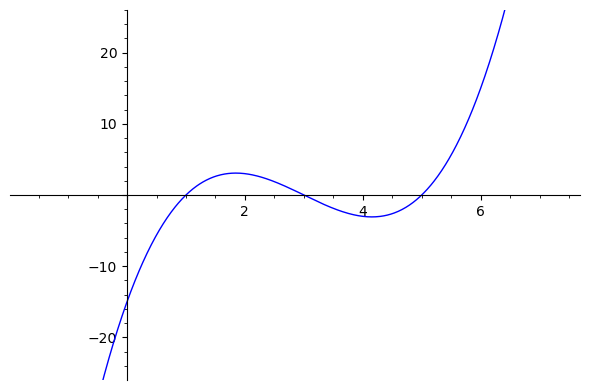

In [228]:
plot.options["xmin"] = -1.8
plot.options["xmax"] = 7.5
plot.options["ymin"] = -25
plot.options["ymax"] = 25

func(x) = x^3 - 9*x^2 + 23*x - 15
plot(func)

Сразу найдем корни через solve, чтобы потом сделать проверки:

In [232]:
roots = solve(func(x), x)
for root in roots:
    show(root)

x == 1

x == 5

x == 3

Запомним их

In [233]:
root1 = roots[0].rhs().n()
root2 = roots[2].rhs().n()
root3 = roots[1].rhs().n()

Реализуем метод Ньютона и метод дихотомии:

In [230]:
def newton(f, a, b, EPS=1e-5):
    x1 = a
    x2 = (a + b) / 2
    
    df = f.derivative()
    
    p = plot(f,(0,6), title="Поиск корня методом Ньютона на отрезке от {} до {}".format(a, b.n(digits=3)))
    
    while abs(x2 - x1) >= EPS:
        x1 = x2
        x2 = x1 - f(x=x1)/df(x=x1)
    
    if a <= x1 <= b:
        p += point((x1, 0), color="red", size=30, zorder=20)
        p += text(r"$x$", (x1, 5), color="black", fontsize=14)
        p += text(r"x $\approx$ {}".format(x1.n(digits=7)), (1, -20), horizontal_alignment="left", color="black")
    else:
        p += text("Корня на данном отрезке нет", (0.5, -20), horizontal_alignment="left", color="black")
    
    return p

In [231]:
def dichotomy(f, a, b, EPS=1e-5):
    x1 = a
    x2 = b
    
    p = plot(f,(0,6), title="Поиск корня методом дихотомии на отрезке от {} до {}".format(a, b.n(digits=3)))
    
    if a <= root1 <= b or a <= root2 <= b or a <= root3 <= b:
        while abs(x2 - x1) / 2 > EPS:
            c = (x1 + x2) / 2
            if func(x1) * func(c) > 0:
                x1 = c
            else:
                x2 = c

        p += point((c, 0), color="red", size=30, zorder=20)
        p += text(r"$x$", (c, 5), color="black", fontsize=14)
        p += text(r"x $\approx$ {}".format(c.n(digits=7)), (0.5, -20), horizontal_alignment="left", color="black")
    else:
        p += text("Корня на данном отрезке нет", (0.5, -20), horizontal_alignment="left", color="black")
        
    return p

Нахождение корней с помощью метода Ньютона

In [159]:
@interact
def _(a=(0, 6, .1)):
    b = a + 0.5
    show(newton(func, a, b))

Interactive function <function _ at 0x7ff792daed30> with 1 widget
  a: FloatSlider(value=3.0, description='a',…

Нахождение корней с помощью метода дихотомии

In [154]:
@interact
def _(a=(0, 6, .1)):
    b = a + 0.5
    show(dichotomy(func, a, b))

Interactive function <function _ at 0x7ff79f103040> with 1 widget
  a: FloatSlider(value=3.0, description='a',…

Выведем результаты двух методов:

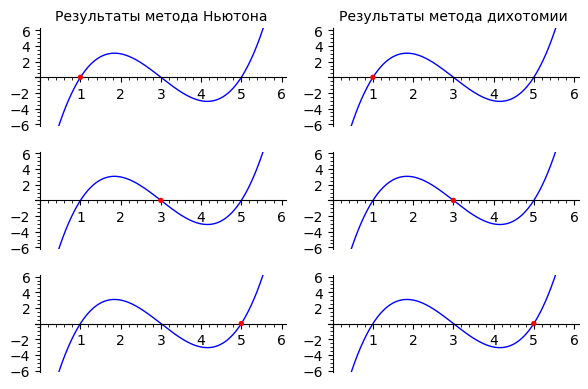

In [234]:
p1 = plot(func, (0, 6), ymin=-6, ymax=6, title="Результаты метода Ньютона")
p1 += point((root1, 0), color="red", size=15, zorder=20)
p2 = plot(func, (0, 6), ymin=-6, ymax=6, title="Результаты метода дихотомии")
p2 += point((root1, 0), color="red", size=15, zorder=20)
p3 = plot(func, (0, 6), ymin=-6, ymax=6)
p3 += point((root2, 0), color="red", size=15, zorder=20)
p4 = plot(func, (0, 6), ymin=-6, ymax=6)
p4 += point((root2, 0), color="red", size=15, zorder=20)
p5 = plot(func, (0, 6), ymin=-6, ymax=6)
p5 += point((root3, 0), color="red", size=15, zorder=20)
p6 = plot(func, (0, 6), ymin=-6, ymax=6)
p6 += point((root3, 0), color="red", size=15, zorder=20)

graphics_array([[p1, p2], [p3, p4], [p5, p6]],show(frame=True, axes=True))

Сравнив с корнями, которые нашли с помощью solve(), можно сказать, что методы довольно близко(точно) определили корни на заданных отрезках.

In [237]:
show(roots)

[x == 1, x == 5, x == 3]

### **Задание 2. Наибольший общий делитель. Полиномы.**  

**Вариант 3**  
$f = 126x^6 - 54x^5 - 28x^3 + 12x^2 + 14x - 6$  
$g = -42x^5 + 39x^4 - 9x^3 - 189x + 81$

Задание:  
1) реализовать расширенный алгоритм Евклида  
2) получить НОД, сравнить его с результатом от функции gcd()  
3) получить представление НОД в виде: f*u + v*g (тождество Безу)  

Определим полиномы кольца рациональных чисел:

In [239]:
R.<x> = PolynomialRing(QQ,'x')
f = 126*x^6 - 54*x^5 - 28*x^3 + 12*x^2 + 14*x - 6
g = -42*x^5 + 39*x^4 - 9*x^3 - 189*x + 81

Расширенный алгоритм Евклида: 

In [242]:
def extended_gcd(a, b):
    if (a == 0):
        return b, 0, 1

    d, x1, y1 = n_gcd(b % a, a)
    x = y1 - (b // a) * x1
    y = x1
    return d, x, y

In [244]:
res, u, v = extended_gcd(f, g)
show("GCD =", res)
show("u = ", u)
show("v = ", v)

'GCD =' -5585932569209944/29199662027163*x + 797990367029992/9733220675721

'u = ' -2208196/28078299*x^3 + 2206657991486/29199662027163*x^2 - 49663432138/3244406891907*x - 562474997414/29199662027163

'v = ' -2208196/9359433*x^4 + 1058465629660/9733220675721*x^3 + 82261925588/9733220675721*x^2 - 99326864276/87598986081489*x + 88540601892796/87598986081489

Нормируем (берем обратный коэффициент для старшего x'а в GCD и домножаем на u и v):

In [250]:
k = 29199662027163/5585932569209944

GCD = res * k
u = u * k
v = v * k

Представление НОД в виде тождества Безу:

In [251]:
show(u*f + v*g)

-x + 3/7

In [252]:
show(k1)

-x + 3/7

Соотношение Безу выполняется, теперь сверим наш ответ со стандартным gcd()

In [249]:
show(gcd(f,g))

x - 3/7

Получился тот же ответ (он кратен нашему ответу)